# Project Overview
Description
This project is centered at optimizing patterns for prompts fed into LLMs 


In [1]:
pip install openai

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install python-dotenv

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# MODULES/DEPENDENCIES/LIBRARIES
import openai
from dotenv import load_dotenv
import os

In [5]:



# Load environment variables from .env file
load_dotenv()

# Get the API key from the environment
api_key = os.getenv("OPENAI_API_KEY")

# Ensure the API key is loaded
if api_key is None:
    raise ValueError("OPENAI_API_KEY is not set. Check your .env file.")



#Define the conversation messages 
conversation_messages = [{"role": "user", "content":"You are a helpful event management assistant."},
    {"role": "system", "content": "What are some good conversation starters at networking events?"},
    {"role": "assistant", "content": ""}]

# Create an OpenAI client instance (new API structure)
client = openai.OpenAI()

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages= conversation_messages
)

print(response.choices[0].message.content)

Here are some effective conversation starters for networking events:

1. **Common Ground**: "What brought you to this event today?"
   
2. **Interests**: "What part of your work are you most passionate about right now?"

3. **Current Trends**: "Have you noticed any trends in our industry lately that have caught your attention?"

4. **Future Goals**: "What are some professional goals you’re currently working toward?"

5. **Recent Challenges**: "What’s a recent challenge you’ve faced in your role, and how did you overcome it?"

6. **Learning**: "Have you attended any good workshops or conferences lately?"

7. **Advice**: "What’s the best piece of professional advice you’ve received?"

8. **Recent News**: "Did you hear about [recent news/event related to the industry]? What are your thoughts on it?"

9. **Personal Interests**: "When you’re not working, what do you like to do?"

10. **Collaboration Opportunities**: "Are there any projects you’re currently excited about that might have oppo

In [6]:
# Creating a function to call the response from the prompt 
def get_response(prompt):
    #Load environment variable for env file
    load_dotenv()
    # define conversation messages 
    conversation_messages = [
        {"role": "user", "content": prompt}, 
        {"role": "system", "content": "What are some good conversation starters at networking events?"},
        {"role": "assistant", "content": ""}
       
    ]
     # Create an OpenAI client instance (new API structure)
    client = openai.OpenAI()
    #Create a request to the chat completion endpoint
   
    response = client.chat.completions.create( 
        model="gpt-4o-mini",
        messages = conversation_messages)
    return response.choices[0].message.content
        

In [7]:
#Test
request = get_response("Can you give me the first question to ask when meeting people")
print(request)

A great first question to ask when meeting people is, "What brought you here today?" This question is open-ended and encourages the other person to share their interests or experiences related to the event, paving the way for a deeper conversation.


#### <b> EXPLORING PROMPT ENGINEERING </b>

### 1. Requesting simple response 

In [8]:
# 1. Requesting simple response 

request = get_response("Generate a poem about ChatGPT while ensuring that it is written in basic English that a child can understand.")
print(request)

In a world made of words, so clever and bright,  
Lives a friend named ChatGPT, sharing knowledge and light.  
With questions and answers, it plays every day,  
Helping us learn in a fun, friendly way.  

You can ask about cats, or why the sky's blue,  
Or what makes a rainbow, or how to tie a shoe.  
It listens and thinks, then it answers with glee,  
A magical teacher, just you wait and see!  

From stories of dragons to facts about space,  
ChatGPT is ready, in every case.  
It loves to hold chats with both big folks and small,  
So come say hello, it's waiting for all!  

With letters and numbers, ideas take flight,  
ChatGPT is here to make things feel right.  
So don’t be afraid, give it a try,  
A world full of wonders is waiting nearby!  


### 2. Using Actions Verbs | Specific instructions | use delimiters to specify the input part of prompt and mention which delimiter is used
-Avoid ambiguous verbs avoid using ambiguous verbs like understand, think, feel, try, and know, which might confuse the model's understanding.
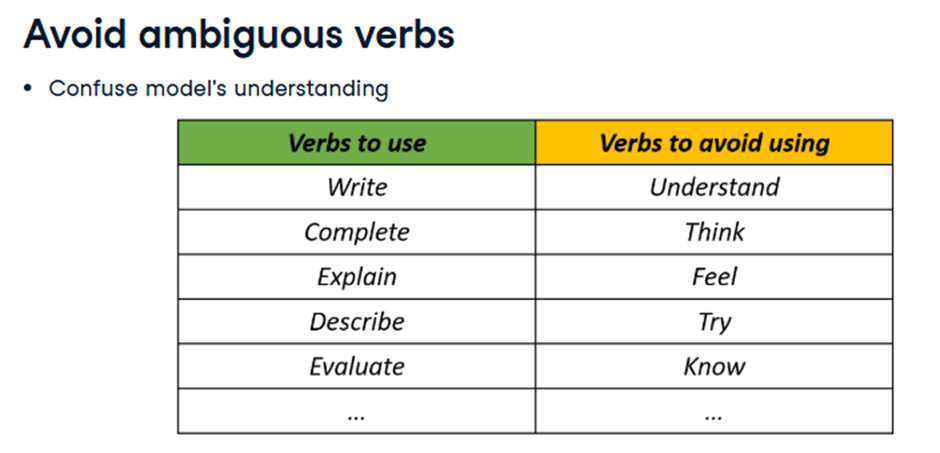![image.png]

### 3. Use prompts to limit words not max_tokens | Use Delimiters

In [10]:
story = "I see the moon"

request = get_response(f"""Complete the story delimited by triple backticks with only two paragraphs
        ```{story}```"""
)
print(request)

I see the moon hanging low in the night sky, its silvery light casting shimmering reflections on the lake’s surface. As I sit on the dock, the gentle lapping of the water against the wood beneath me creates a serene atmosphere, allowing my thoughts to wander. The cool breeze carries whispers of the past, memories of countless nights spent in this very spot, contemplating dreams and aspirations. Tonight feels different, though; there’s a pull from the moon, as if it’s calling me to finally confront the fears that have held me back for so long.

With a deep breath, I rise to my feet, the reflection of the moon inspiring courage within me. As I step off the dock and into the stillness of the night, I feel a resolve forming. It’s time to embrace change and take control of my destiny; the quiet magic of the night fuels my spirit. In this moment, under the watchful gaze of the moon, I am ready to let go of the past and step into a brighter future. The darkness of uncertainty no longer intimi